# Sourcepredict example 1: Gut host species prediction

In [1]:
import pandas as pd
import pandas_ml as pdml

In this example, we will use Sourcepredict and Sourcetracker2 applied to the example dataset provided in the Sourcepredict directory.   

The [example datasets](https://github.com/maxibor/sourcepredict/blob/master/data/modern_gut_microbiomes_sources.csv) contains the following samples:
- *Homo sapiens* gut microbiome ([1](https://doi.org/10.1038/nature11234), [2](https://doi.org/10.1093/gigascience/giz004), [3](https://doi.org/10.1038/s41564-019-0409-6), [4](https://doi.org/10.1016/j.cell.2019.01.001), [5](https://doi.org/10.1038/ncomms7505), [6](http://doi.org/10.1016/j.cub.2015.04.055))
- *Canis familiaris* gut microbiome ([1](https://doi.org/10.1186/s40168-018-0450-3))
- Soil microbiome ([1](https://doi.org/10.1073/pnas.1215210110), [2](https://www.ncbi.nlm.nih.gov/bioproject/?term=322597), [3](https://dx.doi.org/10.1128%2FAEM.01646-17))

## Preparing the data

In [2]:
cnt = pd.read_csv("../data/modern_gut_microbiomes_sources.csv", index_col=0)
labels = pd.read_csv("../data/modern_gut_microbiomes_labels.csv", index_col=0)

This is a TAXID count table containing the samples as columns headers, and the TAXID as row indices

In [3]:
cnt.head()

,SRR1175007,SRR042182,SRR061154,SRR061499,SRR063469,SRR062324,SRR1179037,SRR061236,SRR061456,SRR642021,...,mgm4477903_3,mgm4477807_3,mgm4477874_3,mgm4477904_3,mgm4477804_3,mgm4477873_3,ERR1939166,SRR3578625,ERR1939165,SRR3578645
TAXID,,,,,,,,,,,,,,,,,,,,,
0,3528337.0,11563613.0,10084261.0,20054993.0,8747525.0,12116517.0,4191329.0,13992760.0,14825759.0,11083673.0,...,6169203.0,8820851.0,5713837.0,10238500.0,5055930.0,10380594.0,13391896.0,1553.0,14802198.0,736.0
6,0.0,78.0,0.0,127.0,0.0,79.0,0.0,0.0,0.0,172.0,...,68.0,247.0,211.0,156.0,147.0,383.0,1353.0,0.0,1522.0,0.0
7,0.0,78.0,0.0,127.0,0.0,79.0,0.0,0.0,0.0,172.0,...,68.0,247.0,211.0,156.0,147.0,383.0,1353.0,0.0,1522.0,0.0
9,0.0,129.0,0.0,153.0,0.0,151.0,0.0,165.0,96.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,65.0,0.0
10,0.0,160.0,0.0,193.0,0.0,99.0,0.0,55.0,249.0,238.0,...,0.0,0.0,0.0,0.0,0.0,0.0,263.0,0.0,466.0,0.0


The labels file contains the mapping of samples names with their actual origin (sources)

In [4]:
labels.head()

,labels
SRR1175007,Homo_sapiens
SRR042182,Homo_sapiens
SRR061154,Homo_sapiens
SRR061499,Homo_sapiens
SRR063469,Homo_sapiens


We will divide the source in training (95%) and testing (5%) dataset

In [5]:
cnt_train = cnt.sample(frac=0.95, axis=1)
cnt_test = cnt.drop(cnt_train.columns, axis=1)

We also have to subset the labels file to only the training dataset 

In [6]:
train_labels = labels.loc[cnt_train.columns,:]
test_labels = labels.loc[cnt_test.columns,:]

## Sourcepredict

Last but not least, we must export the files to `csv` to run sourcepredict

In [7]:
cnt_train.to_csv("gut_species_sources.csv")
cnt_test.to_csv("gut_species_sinks.csv")
train_labels.to_csv("gut_species_labels.csv")

We'll now launch sourcepredict with the GMPR normalization method, and the t-SNE embedding, on 6 cores.

In [8]:
%%time
!sourcepredict -s gut_species_sources.csv \
               -l gut_species_labels.csv \
               -n GMPR \
               -m TSNE \
               -e example_embedding.csv \
               -t 6 gut_species_sinks.csv

Step 1: Checking for unknown proportion
  == Sample: SRR1175007 ==
	Adding unknown
	Normalizing (GMPR)
	Computing Bray-Curtis distance
	Performing MDS embedding in 2 dimensions
	KNN machine learning
	Training KNN classifier on 6 cores...
	-> Testing Accuracy: 1.0
	----------------------
	- Sample: SRR1175007
		 known:98.68%
		 unknown:1.32%
  == Sample: SRR061236 ==
	Adding unknown
	Normalizing (GMPR)
	Computing Bray-Curtis distance
	Performing MDS embedding in 2 dimensions
	KNN machine learning
	Training KNN classifier on 6 cores...
	-> Testing Accuracy: 1.0
	----------------------
	- Sample: SRR061236
		 known:85.01%
		 unknown:14.99%
  == Sample: SRR063471 ==
	Adding unknown
	Normalizing (GMPR)
	Computing Bray-Curtis distance
	Performing MDS embedding in 2 dimensions
	KNN machine learning
	Training KNN classifier on 6 cores...
	-> Testing Accuracy: 1.0
	----------------------
	- Sample: SRR063471
		 known:98.4%
		 unknown:1.6%
  == Sample: SRR1930132 ==
	Adding unknown
	Normalizing 

Two files were generated by Sourcepredict:
- `gut_species_sinks.sourcepredict.csv` which contains the proportions of each source  

In [9]:
sourcepred = pd.read_csv("gut_species_sinks.sourcepredict.csv", index_col=0)

In [10]:
sourcepred

,SRR1175007,SRR061236,SRR063471,SRR1930132,SRR1930133,SRR7658586,SRR7658645,SRR7658584,SRR7658607,SRR7658597,...,ERR1915140,ERR1914041,ERR1915022,ERR1915826,ERR1913400,ERR1915765,ERR1915225,mgm4477874_3,ERR1939166,ERR1939165
Canis_familiaris,0.017814,0.015347,0.017765,0.017779,0.017781,0.014379,0.004853,0.015486,0.017825,0.017891,...,0.928216,0.928216,0.928216,0.928216,0.928216,0.928216,0.928216,0.018200,0.011931,0.013898
Homo_sapiens,0.954443,0.822254,0.951788,0.952581,0.952644,0.770401,0.260037,0.829699,0.955022,0.958548,...,0.042128,0.042128,0.042128,0.042128,0.042128,0.042128,0.042128,0.043078,0.028241,0.032896
Soil,0.014516,0.012506,0.014476,0.014488,0.014489,0.011717,0.003955,0.012619,0.014525,0.014579,...,0.014504,0.014504,0.014504,0.014504,0.014504,0.014504,0.014504,0.662431,0.434275,0.505859
unknown,0.013226,0.149893,0.015971,0.015152,0.015086,0.203503,0.731155,0.142196,0.012627,0.008983,...,0.015152,0.015152,0.015152,0.015152,0.015152,0.015152,0.015152,0.276292,0.525554,0.447347


Let's check which organism was predicted for each samples, and compare it with the true source

In [11]:
comparison = sourcepred.idxmax().to_frame(name="prediction").merge(test_labels, left_index=True, right_index=True)
cm = pdml.ConfusionMatrix(y_true=comparison['labels'],y_pred=comparison['prediction'])

/Users/borry/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Let's look at the confusion matrix

In [30]:
cm.to_dataframe()

Predicted,Canis_familiaris,Homo_sapiens,Soil,unknown
Actual,,,,
Canis_familiaris,8,0,0,0
Homo_sapiens,0,10,0,1
Soil,0,0,2,1
unknown,0,0,0,0


Finally, let's compute the accuracy

In [31]:
round(cm.stats()['overall']['Accuracy'],2)

0.91

91% of the sink samples were correctly predicted ! 

- The second file generated by sourcepredict is `example_embedding.csv` which contains the embedding coordinates of all samples (sources and sinks)

In [14]:
embed = pd.read_csv("example_embedding.csv", index_col=0)
embed.head()

,PC1,PC2,labels,name
SRR1761672,-12.706208,-7.860738,Homo_sapiens,SRR1761672
SRR061456,-4.520492,24.795073,Homo_sapiens,SRR061456
SRR1761718,-20.427488,-6.425568,Homo_sapiens,SRR1761718
SRR7658589,-23.176891,-2.985772,Homo_sapiens,SRR7658589
ERR1914932,28.669333,12.863045,Canis_familiaris,ERR1914932


We can plot this embedding, using for example, [plotnine](https://plotnine.readthedocs.io/en/stable/), which implements the grammar of graphics in Python

In [15]:
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

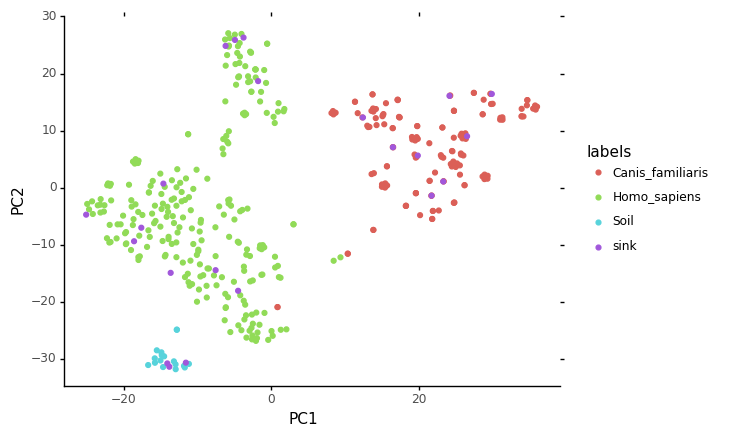

<ggplot: (-9223372029842878797)>

In [16]:
ggplot(data = embed, mapping = aes(x="PC1",y="PC2", color="labels")) + geom_point() + theme_classic()

We can see on this plot where the sink samples were embedded

## Sourcetracker2

"[SourceTracker](https://www.ncbi.nlm.nih.gov/pubmed/21765408) is designed to predict the source of microbial communities in a set of input samples" and is generally consired as the gold standard method to do so.
The version 2 is a rewrite of the original Sourcetracker in Python.

We'll reuse the same training and test files, but we need to reformat them a bit for sourcetracker:
- In sourcetracker, the source (training) and sink (file) TAXIDs count table is a single file
- The metadata file is slightly different

In [17]:
cnt.to_csv("gut_species_taxid.csv", sep="\t", index_label="TAXID")

In [18]:
test_labels['SourceSink'] = ['sink']*test_labels.shape[0]

In [19]:
train_labels['SourceSink'] = ['source']*train_labels.shape[0]

In [20]:
metadata = train_labels.append(test_labels).rename(columns = {"labels":"Env"})[['SourceSink','Env']]
metadata.head()

,SourceSink,Env
SRR1761672,source,Homo_sapiens
SRR061456,source,Homo_sapiens
SRR1761718,source,Homo_sapiens
SRR7658589,source,Homo_sapiens
ERR1914932,source,Canis_familiaris


In [21]:
metadata.to_csv("st_gut_species_metadata.csv", sep="\t", index_label='#SampleID')

Finally, we need to convert the TAXIDs count table to biom format

In [22]:
!biom convert -i gut_species_taxid.csv -o gut_species_taxid.biom --table-type="Taxon table" --to-json

Soucetracker launch command: `sourcetracker2 gibbs -i gut_species_taxid.biom -m st_gut_species_metadata.csv -o gut_species --jobs 6`  
(Sourcetracker2 was run on a Linux remote server because of issues running it on MacOS)

In [32]:
st_pred = pd.read_csv("gut_species/mixing_proportions.txt", sep = "\t", index_col=0)
st_pred.head()

,Canis_familiaris,Homo_sapiens,Soil,Unknown
#SampleID,,,,
SRR1175007,0.0170,0.9609,0.0063,0.0158
SRR061236,0.0358,0.9365,0.0074,0.0203
SRR063471,0.0121,0.9724,0.0032,0.0123
SRR1930132,0.1466,0.3761,0.4477,0.0296
SRR1930133,0.1182,0.5082,0.3507,0.0229


In [34]:
st_comparison = st_pred.idxmax(axis=1).to_frame(name="prediction")
st_comparison.head()

,prediction
#SampleID,
SRR1175007,Homo_sapiens
SRR061236,Homo_sapiens
SRR063471,Homo_sapiens
SRR1930132,Soil
SRR1930133,Homo_sapiens


Let's compare the SourceTracker prediction with the true source

In [35]:
comparison2 = st_comparison.merge(test_labels, left_index=True, right_index=True)
comparison2

,prediction,labels,SourceSink
SRR1175007,Homo_sapiens,Homo_sapiens,sink
SRR061236,Homo_sapiens,Homo_sapiens,sink
SRR063471,Homo_sapiens,Homo_sapiens,sink
SRR1930132,Soil,Homo_sapiens,sink
SRR1930133,Homo_sapiens,Homo_sapiens,sink
SRR7658586,Homo_sapiens,Homo_sapiens,sink
SRR7658645,Homo_sapiens,Homo_sapiens,sink
SRR7658584,Soil,Homo_sapiens,sink
SRR7658607,Homo_sapiens,Homo_sapiens,sink
SRR7658597,Homo_sapiens,Homo_sapiens,sink


Computing the accuracy

In [36]:
cm2 = pdml.ConfusionMatrix(y_true=comparison2["labels"], y_pred=comparison2["prediction"])
cm2.to_dataframe()

Predicted,Canis_familiaris,Homo_sapiens,Soil
Actual,,,
Canis_familiaris,7,0,1
Homo_sapiens,0,9,2
Soil,0,0,3


In [38]:
acc2 = round(cm2.stats()['overall']['Accuracy'],2)

0.86

Here, Sourcetracker only managed to predict 86% of the sink samples origin correctly

## Conclusion
On this dataset, we've seen that Sourcepredict performs similary or even better than Sourcetracker on predicting accurately the source species